In [1]:
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
from plotly.offline import iplot

### Diamond DataSet

In [33]:
diamond = sns.load_dataset('diamonds')

In [5]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


          cut color  Count
0        Fair     D    163
1        Fair     E    224
2        Fair     F    312
3        Fair     G    314
4        Fair     H    303
5        Fair     I    175
6        Fair     J    119
7        Good     D    662
8        Good     E    933
9        Good     F    909
10       Good     G    871
11       Good     H    702
12       Good     I    522
13       Good     J    307
14      Ideal     D   2834
15      Ideal     E   3903
16      Ideal     F   3826
17      Ideal     G   4884
18      Ideal     H   3115
19      Ideal     I   2093
20      Ideal     J    896
21    Premium     D   1603
22    Premium     E   2337
23    Premium     F   2331
24    Premium     G   2924
25    Premium     H   2360
26    Premium     I   1428
27    Premium     J    808
28  Very Good     D   1513
29  Very Good     E   2400
30  Very Good     F   2164
31  Very Good     G   2299
32  Very Good     H   1824
33  Very Good     I   1204
34  Very Good     J    678


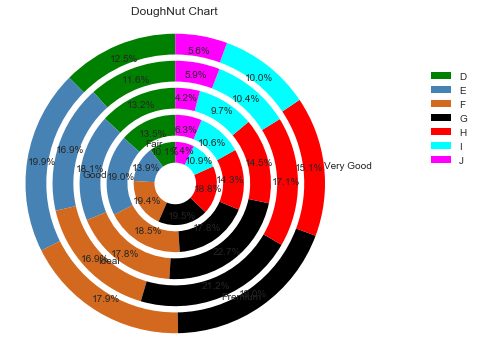

In [116]:
# 1 Donut Chart
dia_cut_col = diamond.groupby(['cut', 'color']).size()
dia_cut_col = pd.DataFrame(dia_cut_col)
dia_cut_col = dia_cut_col.reset_index()
dia_cut_col = dia_cut_col.rename(columns={0:'Count'})
#print(dia_cut_col)
col=['green', 'steelblue', 'chocolate', 'black', 'red', 'cyan', 'magenta']
fig = plt.figure(figsize = (6, 6))
pie = plt.pie(dia_cut_col[dia_cut_col['cut']=='Fair']['Count'], 
        labels = ['Fair', '', '', '', '', '',''], labeldistance=1, 
        autopct='%1.1f%%', pctdistance=0.8, startangle=90, wedgeprops=dict(width=0.5), radius=1, colors=col)
plt.pie(dia_cut_col[dia_cut_col['cut']=='Good']['Count'], 
        labels = ['', 'Good', '', '', '','',''], labeldistance=1, 
        autopct='%1.1f%%', pctdistance=0.8, startangle=90, wedgeprops=dict(width=0.5), radius=1.65, colors=col)
plt.pie(dia_cut_col[dia_cut_col['cut']=='Ideal']['Count'], 
        labels = ['', '', 'Ideal', '', '','',''], labeldistance=1, 
        autopct='%1.1f%%', pctdistance=0.9, startangle=90, wedgeprops=dict(width=0.5), radius=2.3, colors=col)
plt.pie(dia_cut_col[dia_cut_col['cut']=='Premium']['Count'], 
        labels = ['', '', '', 'Premium', '','',''], labeldistance=1, 
        autopct='%1.1f%%', pctdistance=0.9, startangle=90, wedgeprops=dict(width=0.5), radius=2.95, colors=col)
plt.pie(dia_cut_col[dia_cut_col['cut']=='Very Good']['Count'], 
        labels = ['', '', '', '', 'Very Good','',''], labeldistance=1, 
        autopct='%1.1f%%', pctdistance=0.9, startangle=90, wedgeprops=dict(width=0.5), radius=3.6, colors=col)
plt.axis('equal')
plt.legend(pie[0], labels=dia_cut_col[dia_cut_col['cut']=='Fair']['color'], loc='right',bbox_to_anchor=(1.4, 0.7))
plt.title('DoughNut Chart')
plt.show()


### Interpretation
    - Ideal Cut is the most common among all the other cuts , as Ideal is the top quality 
    - Next to Ideal is Premium with 25 % of the spread among all since after Ideal premium is the next best
    - Good has the least distribution among all the other cuts 
    - Fair has the next least distribution and it is the lowest quality among all

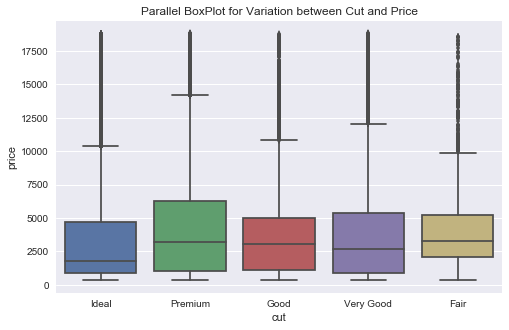

In [66]:
# 2 Parallel BOxplot showing variation of price for each cut

fig = plt.figure(figsize = (8,5))
sns.boxplot(x = 'cut',y ='price',data = diamond)
plt.title('Parallel BoxPlot for Variation between Cut and Price')
plt.show()

### Interpretation
    - There are significant outliers in every cut per the boxplot.
    - Ideal cut is the most expensive of all
    - The IQR value of the Ideal cut is less than the others
    - Fair diamond is equally spread so it is close to normally distributed
    - Premium has the minimum number of outliers

In [14]:

d1000 = diamond.head(1000)

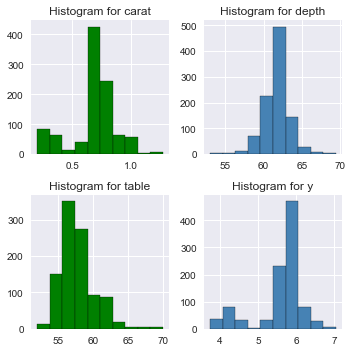

In [117]:
#3) Histogram for Carat depth table and y

fig = plt.figure(figsize = (5,5))
plt.style.use('seaborn')
plt.subplot(2,2,1)
plt.hist(d1000['carat'],color= 'green',edgecolor = 'black')
plt.title('Histogram for carat')
plt.tight_layout()


plt.subplot(2,2,2)
plt.hist(d1000['depth'],color= 'steelblue',edgecolor = 'black')
plt.title('Histogram for depth')
plt.tight_layout()


plt.subplot(2,2,3)
plt.hist(d1000['table'],color= 'green',edgecolor = 'black')
plt.title('Histogram for table')
plt.tight_layout()


plt.subplot(2,2,4)
plt.hist(d1000['y'],color= 'steelblue',edgecolor = 'black')
plt.title('Histogram for y')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()

### Interpretation

Histogram generally describes how the data is distributed

    - Histogram for carat - Most of the Carat weight of the diamond is around 0.6
    - Histogram for depth - Data here is Normally distributed , depth of the diamond is generally arount 60 - 65
    - Histogram for table - Data is normally distributed,table width of top of diamond relative - generally at 55 to 60 
    - Histogram for y - Data is Negatively skewed ,Width of the diamond is little spread and it is negatively skewed

<Figure size 504x504 with 0 Axes>

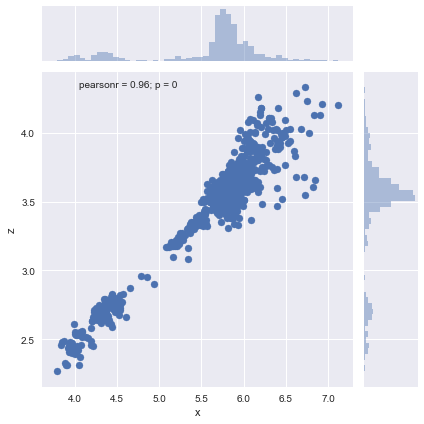

In [113]:
#4) Joint plot for variation of x and z ( Scatter)

fig = plt.figure(figsize = (7,7))
a= sns.jointplot(x = 'x', y = 'z',data= d1000 ,kind='scatter')
#plt.title('Scatter Plot ')
fig.suptitle('ScatterPlot')
plt.show()

### Interpretation
    - From the plot we can see that the variables 'x' and 'z' are stronly positively correlated and the 'r' value also shows
    the same (r = 0.96)
    -Length and Depth of the diamonds are Highly correlated

<Figure size 432x432 with 0 Axes>

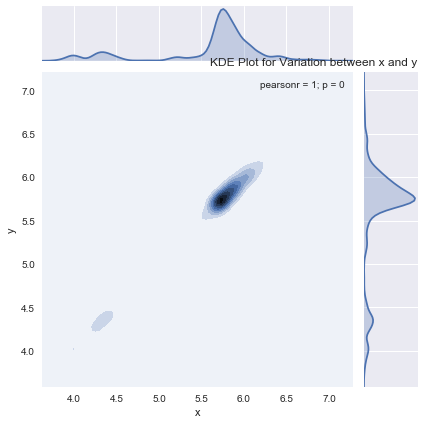

In [83]:
# 5 ) Joint plot for x and y kind kde

fig = plt.figure(figsize = (6,6))
sns.jointplot(x = 'x', y = 'y',data= d1000 ,kind='kde')
plt.title('KDE Plot for Variation between x and y',loc = 'right')
plt.show()

### Interpretation
    - From the plot it is observed that the factors x and y are in perfect correlation with each other as the 'r value is 1
    - Length and Width of the diamond have perfect correlation as it is required for a diamond to be at a good shape

### MPG DataSet

In [30]:
from pandas.plotting import parallel_coordinates

In [34]:
mpg = sns.load_dataset('mpg')
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


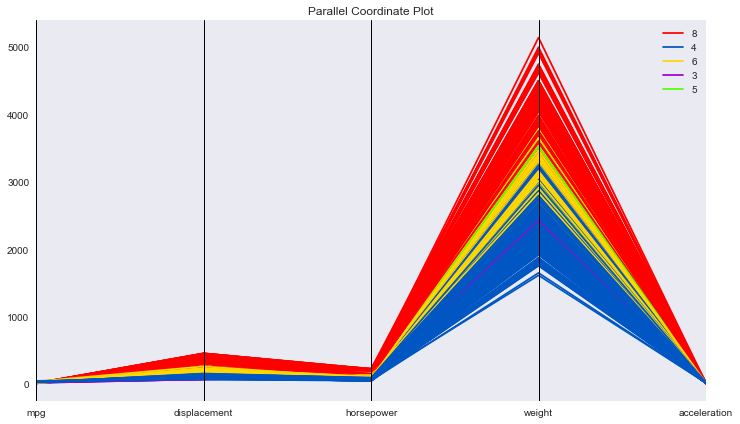

In [62]:
# 'mpg','displacement','horsepower''weight''acceleration' - parallel Coordinate

mpg_pc = mpg.loc[:,['cylinders','mpg','displacement','horsepower','weight','acceleration']]
#mpg_pc.head(2)
fig = plt.figure(figsize = (12,7))
parallel_coordinates(mpg_pc,'cylinders',colormap = plt.get_cmap('prism'))
plt.title('Parallel Coordinate Plot')
plt.show()

### Interpretation
    - Higher the cylinders higher the weight
    - Number of cars with 3 and 5 Cylinders is very less

In [41]:
# Data for correlogram

mpg_num = mpg.drop(['origin','name'],axis = 1)

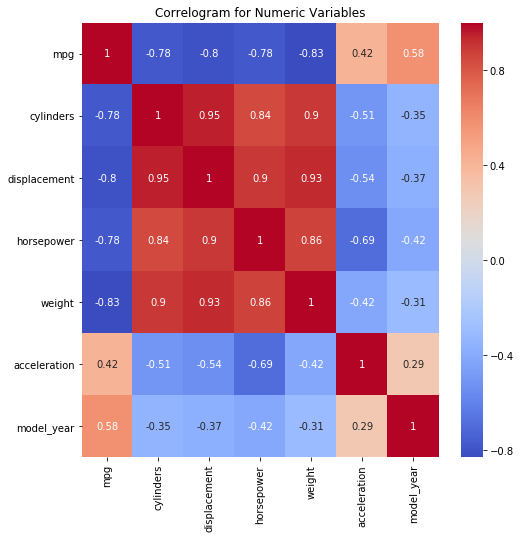

In [43]:
# Correlogram
fig = plt.figure(figsize=(8,8))
sns.heatmap(mpg_num.corr(),cmap='coolwarm',annot = True)
plt.title('Correlogram for Numeric Variables')
plt.show()

### Interpretation
    - Among all Cylinders and Displacement have the highest correlation between each other with o.95
    - Next is between displacement and weight 
    - After that Displacement and HorsePower
    - Overall Displacement is affected by various factors such as Horsepower,weight and cylinders

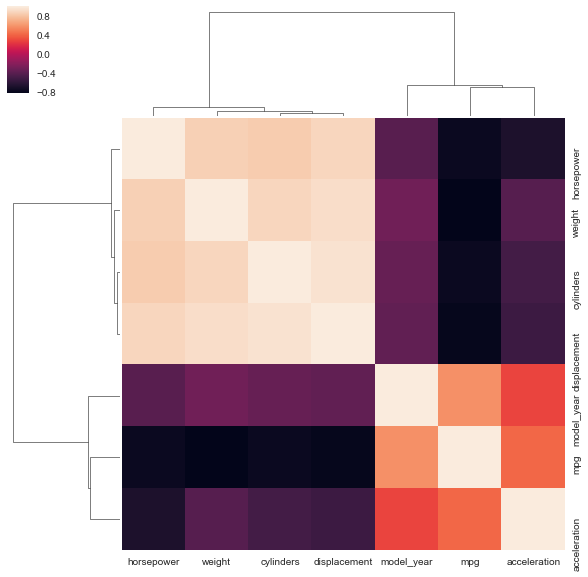

In [68]:
# Cluster Map for the same

sns.clustermap(mpg_num.corr())

Text(0.5,1,'ScatterPlot')

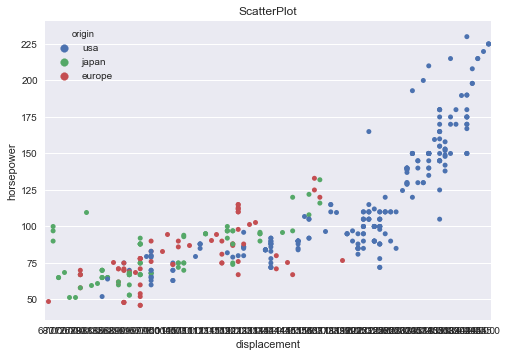

In [94]:
# ScatterPlot for displacement and horsepower , cars origin in different colors

sns.stripplot(x='displacement',y='horsepower',data = mpg, hue = 'origin')
plt.title('ScatterPlot')

### Interpretation
    - Cars from USA origin have more Horsepower and the spread is more
    - Cars from Japan have medium displacement 
    - Cars from Europe have a very wide displacement and low Horsepower comparing to USA

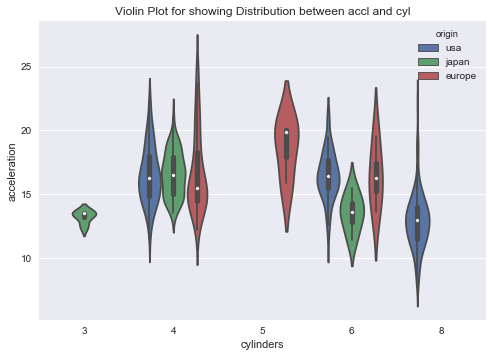

In [65]:
# Violin Plot for acceleration and cylinders and take hue as origin

sns.violinplot(x='cylinders',y= 'acceleration',hue = 'origin',data = mpg)
plt.title('Violin Plot for showing Distribution between accl and cyl')
plt.show()

### Interpretation
    - 3 Cylinder vehichles are only produced in Japan
    - Vehicles with more than 6 cylinders are only Produced by USA and those vehicles's acceleration is good

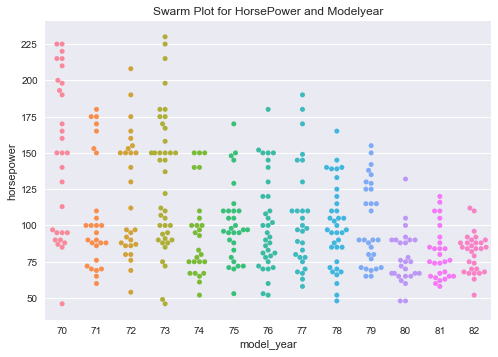

In [64]:
# Swarm Plot

sns.swarmplot(x= 'model_year',y = 'horsepower',data = mpg)
plt.title('Swarm Plot for HorsePower and Modelyear')
plt.show()

### Interpretation
    - Horsepower is constantly decreasing with the increase in  model_year
    - Early 70's have the highest HorsepOwer among all